## 任务3 - 模型构建（2天）
任务3：用逻辑回归、svm和决策树；随机森林和XGBoost进行模型构建，评分方式任意，如准确率等。（不需要考虑模型调参）时间：2天


[参考答案](./../参考答案)

## 数据集预览

In [70]:
import pandas as pd
data = pd.read_csv('./data.csv')
print(data.shape)
data.head()

(4754, 90)


,Unnamed: 0,custid,trade_no,bank_card_no,low_volume_percent,middle_volume_percent,take_amount_in_later_12_month_highest,trans_amount_increase_rate_lately,trans_activity_month,trans_activity_day,...,loans_max_limit,loans_avg_limit,consfin_credit_limit,consfin_credibility,consfin_org_count_current,consfin_product_count,consfin_max_limit,consfin_avg_limit,latest_query_day,loans_latest_day
0,5,2791858,20180507115231274000000023057383,����1,0.01,0.99,0,0.90,0.55,0.313,...,2900.0,1688.0,1200.0,75.0,1.0,2.0,1200.0,1200.0,12.0,18.0
1,10,534047,20180507121002192000000023073000,����1,0.02,0.94,2000,1.28,1.00,0.458,...,3500.0,1758.0,15100.0,80.0,5.0,6.0,22800.0,9360.0,4.0,2.0
2,12,2849787,20180507125159718000000023114911,����1,0.04,0.96,0,1.00,1.00,0.114,...,1600.0,1250.0,4200.0,87.0,1.0,1.0,4200.0,4200.0,2.0,6.0
3,13,1809708,20180507121358683000000388283484,����1,0.00,0.96,2000,0.13,0.57,0.777,...,3200.0,1541.0,16300.0,80.0,5.0,5.0,30000.0,12180.0,2.0,4.0
4,14,2499829,20180507115448545000000388205844,����1,0.01,0.99,0,0.46,1.00,0.175,...,2300.0,1630.0,8300.0,79.0,2.0,2.0,8400.0,8250.0,22.0,120.0


In [71]:
# 观察各列的属性名称
data.columns

Index([u'Unnamed: 0', u'custid', u'trade_no', u'bank_card_no',
       u'low_volume_percent', u'middle_volume_percent',
       u'take_amount_in_later_12_month_highest',
       u'trans_amount_increase_rate_lately', u'trans_activity_month',
       u'trans_activity_day', u'transd_mcc', u'trans_days_interval_filter',
       u'trans_days_interval', u'regional_mobility', u'student_feature',
       u'repayment_capability', u'is_high_user', u'number_of_trans_from_2011',
       u'first_transaction_time', u'historical_trans_amount',
       u'historical_trans_day', u'rank_trad_1_month', u'trans_amount_3_month',
       u'avg_consume_less_12_valid_month', u'abs',
       u'top_trans_count_last_1_month', u'avg_price_last_12_month',
       u'avg_price_top_last_12_valid_month', u'reg_preference_for_trad',
       u'trans_top_time_last_1_month', u'trans_top_time_last_6_month',
       u'consume_top_time_last_1_month', u'consume_top_time_last_6_month',
       u'cross_consume_count_last_1_month',
       u'tr

## 数据预处理

> 无用特征删除、字符型特征编码和缺失值填充。

###  删除无用特征

'bank_card_no','source'的取值**无区分度**

'Unnamed: 0', 'custid', 'trade_no'和id_name'**与预测无关**

In [72]:
data.drop(['Unnamed: 0', 'custid', 'trade_no', 'bank_card_no', 'source', 'id_name'], 
          axis=1, inplace=True)
print(data.shape)

(4754, 84)


**日期特征**（暂时删除, 以后再处理。）

In [73]:
data.drop(['first_transaction_time', 'latest_query_time', 'loans_latest_time'], 
          axis=1, inplace=True)

### 字符型特征-编码

In [74]:
data['reg_preference_for_trad'].value_counts()

һ�߳���      3403
���߳���     1064
����         150
���߳���      131
��������       4
Name: reg_preference_for_trad, dtype: int64

In [75]:
dic = {}
for i, val in enumerate(list(data['reg_preference_for_trad'].unique())):
    dic[val] = i

In [76]:
data['reg_preference_for_trad'] = data['reg_preference_for_trad'].map(dic)

### 缺失值处理

In [77]:
for feature in data.columns:
    summ = data[feature].isnull().sum()
    if summ:
        print('%.4f'%(summ*100/4754), '%',  '--', feature)

('0.0000', '%', '--', 'low_volume_percent')
('0.0000', '%', '--', 'middle_volume_percent')
('0.0000', '%', '--', 'trans_amount_increase_rate_lately')
('0.0000', '%', '--', 'trans_activity_month')
('0.0000', '%', '--', 'trans_activity_day')
('0.0000', '%', '--', 'transd_mcc')
('0.0000', '%', '--', 'trans_days_interval_filter')
('0.0000', '%', '--', 'trans_days_interval')
('0.0000', '%', '--', 'regional_mobility')
('63.0000', '%', '--', 'student_feature')
('0.0000', '%', '--', 'number_of_trans_from_2011')
('0.0000', '%', '--', 'historical_trans_day')
('0.0000', '%', '--', 'rank_trad_1_month')
('0.0000', '%', '--', 'avg_consume_less_12_valid_month')
('0.0000', '%', '--', 'top_trans_count_last_1_month')
('2.0000', '%', '--', 'avg_price_top_last_12_valid_month')
('0.0000', '%', '--', 'trans_top_time_last_1_month')
('0.0000', '%', '--', 'trans_top_time_last_6_month')
('0.0000', '%', '--', 'consume_top_time_last_1_month')
('0.0000', '%', '--', 'consume_top_time_last_6_month')
('8.0000', '%', 

1) student_feature 缺失占比多, 需要用**众数**填充;

In [78]:
data['student_feature'].value_counts()

1.0    1754
2.0       2
Name: student_feature, dtype: int64

In [79]:
data['student_feature'].fillna(1.0, inplace = True)

In [80]:
data['student_feature'].value_counts()

1.0    4752
2.0       2
Name: student_feature, dtype: int64

2) 其余特征用**均值**填充。

In [81]:
for feature in data.columns:
    summ = data[feature].isnull().sum()
    if summ:
        data[feature].fillna(data[feature].mean(), inplace = True)

'Unnamed: 0', 'custid', 'trade_no', 'bank_card_no', 'source'都没用, 'id_name'表示姓名, 没用？

'take_amount_in_later_12_month_highest'数值跨度可能较大, 归一化？

某些特征可能包含缺失值NAN

'reg_preference_for_trad'需要编码

'latest_query_time', 'loans_latest_time'为日期特征

### 数据集划分

In [82]:
features = [x for x in data.columns if x not in ['status']]

In [83]:
import warnings
warnings.filterwarnings("ignore")
# 划分训练集测试集
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = data[features]
y = data.status

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=2333)

# 特征归一化
std = StandardScaler()
X_train = std.fit_transform(X_train)
X_test = std.transform(X_test)

### LR模型

In [84]:
from sklearn.linear_model import LogisticRegression

lr2 = LogisticRegression()
lr2.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

### SVM模型



In [85]:
from sklearn import svm

svm_linear = svm.SVC(kernel = 'linear', probability=True).fit(X_train, y_train)
svm_poly = svm.SVC(kernel = 'poly', probability=True).fit(X_train, y_train)
svm_rbf = svm.SVC(probability=True).fit(X_train, y_train)
svm_sigmoid = svm.SVC(kernel = 'sigmoid',probability=True).fit(X_train, y_train)

### 决策树模型

> 树模型，特征不需归一化。

In [86]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth=4)
dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

### XGBoost模型

In [87]:
import warnings
warnings.filterwarnings("ignore")
from xgboost.sklearn import XGBClassifier

xgb = XGBClassifier()
xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1)

### LightGBM模型

In [88]:
from lightgbm.sklearn import LGBMClassifier

lgb= LGBMClassifier()
lgb.fit(X_train, y_train)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
        importance_type='split', learning_rate=0.1, max_depth=-1,
        min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
        n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
        random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
        subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

## 模型调参

In [89]:
from sklearn.model_selection import GridSearchCV

lr = LogisticRegression()
lr_param = {'penalty': ('l1', 'l2'), 'C': [0.0001,0.001,0.01,0.1,1,10,100,1000]}

grid = GridSearchCV(lr, param_grid = lr_param, cv = 5)
grid.fit(X_train, y_train)

print(grid.best_params_, grid.best_score_)

({'penalty': 'l1', 'C': 0.1}, 0.7883979561166216)


## 模型评估

> 观察accuracy、precision，recall和f1-score、auc的取值，并画出roc曲线图

In [90]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score,roc_curve, auc
import matplotlib.pyplot as plt
%matplotlib inline

In [91]:
def model_metrics(clf, X_train, X_test, y_train, y_test):
    # 预测
    y_train_pred = clf.predict(X_train)
    y_test_pred = clf.predict(X_test)
    
    y_train_proba = clf.predict_proba(X_train)[:,1]
    y_test_proba = clf.predict_proba(X_test)[:,1]
    
    # 准确率
    print(u'[准确率]')
    print(u'训练集：'+ '%.4f'%accuracy_score(y_train, y_train_pred))
    print(u'测试集：'+ '%.4f'%accuracy_score(y_test, y_test_pred))
    
    # 精准率
    print(u'[精准率]')
    print(u'训练集：'+ '%.4f'%precision_score(y_train, y_train_pred))
    print(u'测试集：'+ '%.4f'%precision_score(y_test, y_test_pred))

    # 召回率
    print(u'[召回率]')
    print(u'训练集：'+ '%.4f'%recall_score(y_train, y_train_pred))
    print(u'测试集：'+ '%.4f'%recall_score(y_test, y_test_pred))
    
    # f1-score
    print(u'[f1-score]')
    print(u'训练集：'+ '%.4f'%f1_score(y_train, y_train_pred))
    print(u'测试集：'+ '%.4f'%f1_score(y_test, y_test_pred))
    
    # auc取值：用roc_auc_score或auc
    print(u'[auc值]')
    print(u'训练集：'+ '%.4f'%roc_auc_score(y_train, y_train_proba))
    print(u'测试集：'+ '%.4f'%roc_auc_score(y_test, y_test_proba))
    
    # roc曲线
    fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_train_proba, pos_label = 1)
    fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_test_proba, pos_label = 1)
    
    label = ["Train - AUC:{:.4f}".format(auc(fpr_train, tpr_train)), 
             "Test - AUC:{:.4f}".format(auc(fpr_test, tpr_test))]
    plt.plot(fpr_train,tpr_train)
    plt.plot(fpr_test,tpr_test)
    plt.plot([0, 1], [0, 1], 'd--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(label, loc = 4)
    plt.title("ROC curve")

[准确率]
训练集：0.7995
测试集：0.8024
[精准率]
训练集：0.7094
测试集：0.7052
[召回率]
训练集：0.3488
测试集：0.3456
[f1-score]
训练集：0.4677
测试集：0.4639
[auc值]
训练集：0.8054
测试集：0.8050


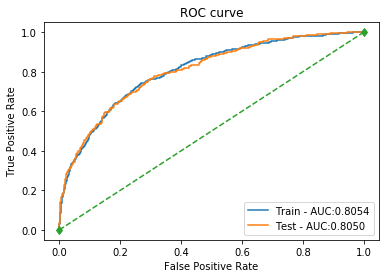

In [92]:
# 逻辑回归
model_metrics(lr2, X_train, X_test, y_train, y_test)

[准确率]
训练集：0.7908
测试集：0.7947
[精准率]
训练集：0.7647
测试集：0.7885
[召回率]
训练集：0.2476
测试集：0.2323
[f1-score]
训练集：0.3741
测试集：0.3589
[auc值]
训练集：0.8042
测试集：0.8092


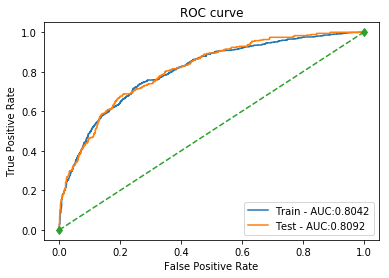

In [93]:
# 线性SVM
model_metrics(svm_linear, X_train, X_test, y_train, y_test)

[准确率]
训练集：0.8284
测试集：0.7554
[精准率]
训练集：0.9786
测试集：0.5208
[召回率]
训练集：0.3274
测试集：0.1416
[f1-score]
训练集：0.4906
测试集：0.2227
[auc值]
训练集：0.9391
测试集：0.7117


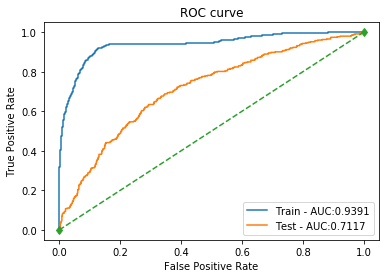

In [94]:
# 多项式SVM
model_metrics(svm_poly, X_train, X_test, y_train, y_test)

[准确率]
训练集：0.8266
测试集：0.7975
[精准率]
训练集：0.9046
测试集：0.7963
[召回率]
训练集：0.3500
测试集：0.2436
[f1-score]
训练集：0.5047
测试集：0.3731
[auc值]
训练集：0.9170
测试集：0.7680


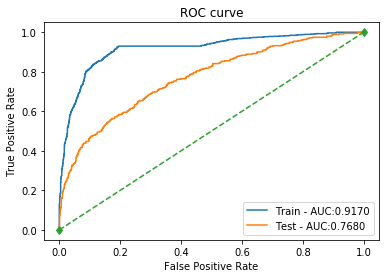

In [95]:
# 高斯核SVM
model_metrics(svm_rbf, X_train, X_test, y_train, y_test)

[准确率]
训练集：0.7205
测试集：0.7379
[精准率]
训练集：0.4373
测试集：0.4662
[召回率]
训练集：0.3738
测试集：0.4108
[f1-score]
训练集：0.4031
测试集：0.4367
[auc值]
训练集：0.6600
测试集：0.6784


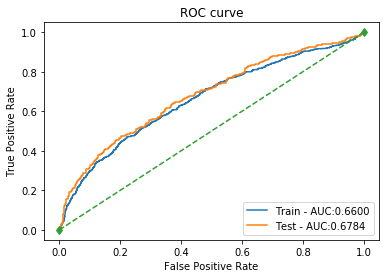

In [96]:
# sigmoid-SVM
model_metrics(svm_sigmoid, X_train, X_test, y_train, y_test)

[准确率]
训练集：0.7920
测试集：0.7737
[精准率]
训练集：0.6581
测试集：0.5862
[召回率]
训练集：0.3667
测试集：0.2890
[f1-score]
训练集：0.4709
测试集：0.3871
[auc值]
训练集：0.7727
测试集：0.7468


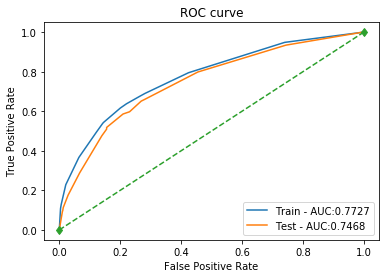

In [97]:
# 决策树
model_metrics(dt, X_train, X_test, y_train, y_test)

[准确率]
训练集：0.8521
测试集：0.8045
[精准率]
训练集：0.8718
测试集：0.7079
[召回率]
训练集：0.4857
测试集：0.3569
[f1-score]
训练集：0.6239
测试集：0.4746
[auc值]
训练集：0.9166
测试集：0.7972


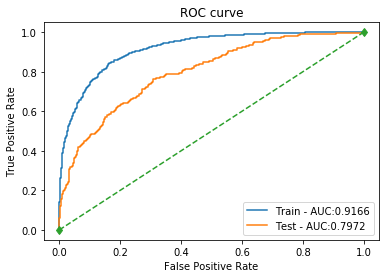

In [98]:
# XGBoost
model_metrics(xgb, X_train, X_test, y_train, y_test)

[准确率]
训练集：0.9949
测试集：0.7961
[精准率]
训练集：1.0000
测试集：0.6550
[召回率]
训练集：0.9798
测试集：0.3711
[f1-score]
训练集：0.9898
测试集：0.4738
[auc值]
训练集：1.0000
测试集：0.7869


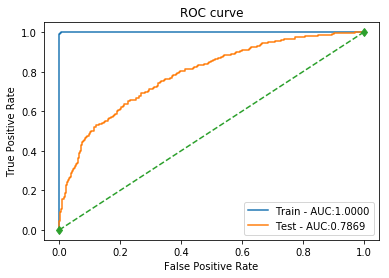

In [99]:
# lightGBM
model_metrics(lgb, X_train, X_test, y_train, y_test)